Description

* This is a python program for finance. 
* This program will show you how to compute portfolio simple returns, get daily returns, volatility etc


In [34]:
# Import the libraries
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint

plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
# Get the stock symbols for the protfolio
# FAANG
stock_symbols = ["FB","AMZN","AAPL","NFLX","GOOG"]
pprint(stock_symbols)

['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']


In [3]:
# Get the stock symbol starting date - post FB IPO
start_date = '2013-01-01'

In [4]:
# Get today's date and format it in the form YYYY-mm-dd
today = datetime.today().strftime("%Y-%m-%d")
pprint(today)

'2022-05-13'


In [5]:
# Get the number of assets in the portfolio
num_assets = len(stock_symbols)
pprint("You have %d assets in your portfolio" % num_assets)

'You have 5 assets in your portfolio'


In [6]:
# Create a function to get the stock prices in the portfolio
def get_portfolio(stocks=stock_symbols, start=start_date, end=today, col='Adj Close'):
    data = web.DataReader(stocks, data_source='yahoo', start=start, end=end)[col]
    return data

In [7]:
# Get the stock portfolio adjusted close price
my_stocks = get_portfolio(stock_symbols)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-12-31,26.620001,250.869995,16.394848,13.227143,352.369232
2013-01-02,28.000000,257.309998,16.914259,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.700762,13.798571,360.483826
2013-01-04,28.760000,259.149994,16.235573,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.140070,14.171429,366.003143
...,...,...,...,...,...
2022-05-06,203.770004,2295.449951,157.279999,180.970001,2313.199951
2022-05-09,196.210007,2175.780029,152.059998,173.100006,2261.679932
2022-05-10,197.649994,2177.179932,154.509995,177.660004,2291.689941


In [13]:
# Create a function to visualize the portfolio

def show_graph(stocks=stock_symbols, start=start_date, end=today, col='Adj Close'):

    # Create a title for the portfolio
    title = 'Portfolio ' + col + ' Price History'

    # Get the stocks
    my_stocks = get_portfolio(stocks=stocks, start=start, end=end, col=col)

    # Set figure size
    plt.figure(figsize=(12, 8))

    # Loop through each stocka and plot the price
    for s in my_stocks.columns.values:
        plt.plot(my_stocks[s], label=s)
    
    plt.title(title)
    plt.xlabel("Date", fontsize=18)
    plt.ylabel(col + " Price USD ($)", fontsize=18)
    plt.legend(my_stocks.columns.values, loc="upper left")
    plt.show()

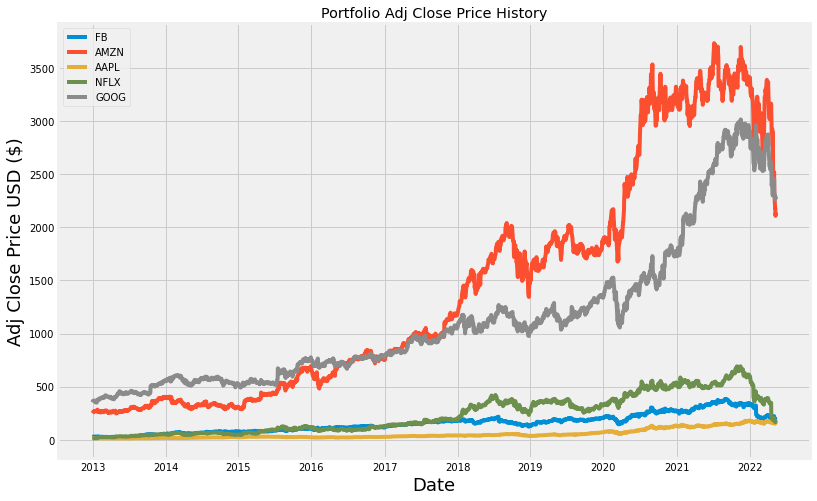

In [14]:
# Show the adjusted close price for FAANG
show_graph(stock_symbols)

In [16]:
# Calculate the simple returns: new price / old price -1
daily_simple_returns = my_stocks.pct_change(1)

# Show daily simple returns
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN
2013-01-02,0.051841,0.025671,0.031681,-0.006264,0.022435
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027854,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
...,...,...,...,...,...
2022-05-06,-0.021654,-0.014041,0.004727,-0.039029,-0.009306
2022-05-09,-0.037101,-0.052134,-0.033189,-0.043488,-0.022272
2022-05-10,0.007339,0.000643,0.016112,0.026343,0.013269


In [17]:
# Check calc for first day of FB returns
(27.77/28)-1

-0.00821428571428573

In [18]:
# Show the stock correlation
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.530292,0.465429,0.388568,0.578484
AMZN,0.530292,1.000000,0.476895,0.459114,0.607331
AAPL,0.465429,0.476895,1.000000,0.285375,0.542461
NFLX,0.388568,0.459114,0.285375,1.000000,0.417318
GOOG,0.578484,0.607331,0.542461,0.417318,1.000000


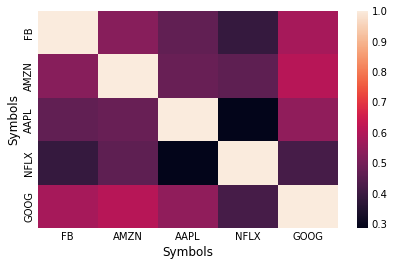

In [20]:
# Obviously tech stocks have high correlation with each other
sns.heatmap(daily_simple_returns.corr())
plt.show()

In [21]:
# Show the co-variance matrix for simple returns - diagonal is the variance of an asset
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000517,0.000237,0.000190,0.000262,0.000215
AMZN,0.000237,0.000387,0.000168,0.000268,0.000196
AAPL,0.000190,0.000168,0.000322,0.000152,0.000159
NFLX,0.000262,0.000268,0.000152,0.000878,0.000203
GOOG,0.000215,0.000196,0.000159,0.000203,0.000268


In [37]:
# Show the variance of all stocks in the FAANG portfolio
daily_simple_returns.var()

Symbols
FB      0.000517
AMZN    0.000387
AAPL    0.000322
NFLX    0.000878
GOOG    0.000268
dtype: float64

In [38]:
# Calculate the standard deviation of returns
np.sqrt(daily_simple_returns.var())

Symbols
FB      0.022735
AMZN    0.019681
AAPL    0.017940
NFLX    0.029630
GOOG    0.016381
dtype: float64

In [44]:
# Print the standard devation for daily simple returns
print("The Stock Volatility:")
daily_simple_returns.std()

The Stock Volatility:


Symbols
FB      0.022735
AMZN    0.019681
AAPL    0.017940
NFLX    0.029630
GOOG    0.016381
dtype: float64

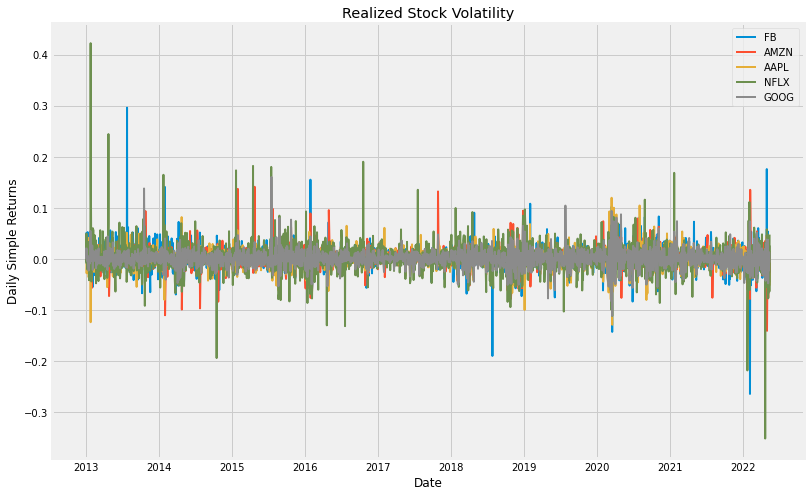

In [41]:
# Visualise stocks daily simple returns
plt.figure(figsize=(12, 8))

# Loop through each stock and plot the simple returns
for s in daily_simple_returns.columns.values:
    plt.plot(daily_simple_returns.index, daily_simple_returns[s], lw=2, label=s)

# Create a legend
plt.legend(loc='upper right', fontsize=10)
plt.title('Realized Stock Volatility')
plt.ylabel('Daily Simple Returns')
plt.xlabel('Date')
plt.show()

In [45]:
# Show the mean of the daily simple return
daily_mean_simple_returns = daily_simple_returns.mean()

# Print
print("The Daily mean simple returns:")
print(daily_mean_simple_returns)

The Daily mean simple returns:
Symbols
FB      0.001095
AMZN    0.001102
AAPL    0.001079
NFLX    0.001530
GOOG    0.000922
dtype: float64


In [48]:
# Calculate the expected portfolio daily returns
# 40% to FB, 10% to AMZN 30% to AAPL, 10% to NFLX and 10% to GOOG
random_weights = np.array([0.4, 0.1, 0.3, 0.1, 0.1])

portfolio_simple_returns = np.sum(daily_mean_simple_returns * random_weights)

# Print the expected portfolio return
print("The daily expected portfolio return: " + str(portfolio_simple_returns*100))

The daily expected portfolio return: 0.11171987234664055


In [50]:
# Get the yearly simple return
print("Expected annualized portfolio simple return: " + str(portfolio_simple_returns*100*252))

Expected annualized portfolio simple return: 28.15340783135342


In [51]:
# Calculate the growth of the investment
# Total returns (cumulative) from our investment

daily_cumulative_simple_return = (daily_simple_returns+1).cumprod()

# Show the cumulative simple returns
daily_cumulative_simple_return

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2012-12-31,NaN,NaN,NaN,NaN,NaN
2013-01-02,1.051841,1.025671,1.031681,0.993736,1.022435
2013-01-03,1.043201,1.030335,1.018659,1.043201,1.023029
2013-01-04,1.080391,1.033005,0.990285,1.036613,1.043244
2013-01-07,1.105184,1.070116,0.984460,1.071390,1.038692
...,...,...,...,...,...
2022-05-06,7.654771,9.149958,9.593258,13.681715,6.564705
2022-05-09,7.370774,8.672938,9.274865,13.086726,6.418494
2022-05-10,7.424868,8.678519,9.424302,13.431472,6.503661


Cumulative Returns

(period_1 + 1) * (period_2+1) * ... * (period_n+1)

In [52]:
(daily_simple_returns["GOOG"][1] + 1)*(daily_simple_returns["GOOG"][2] + 1)

1.023028666423879

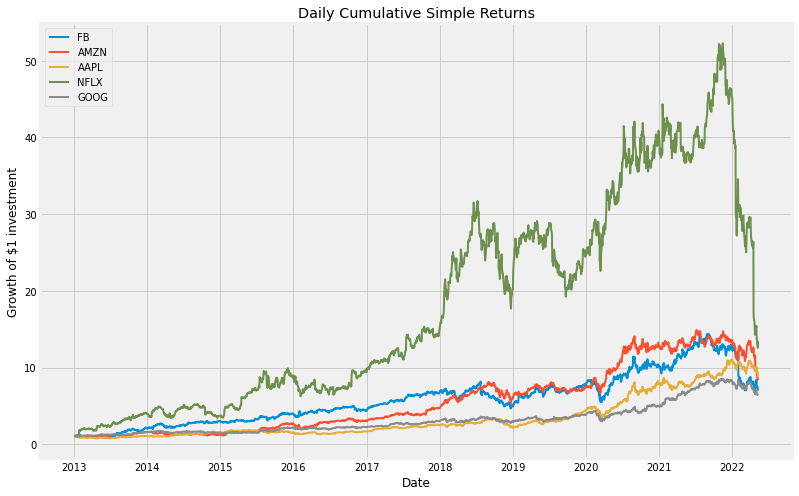

In [54]:
# Visualize the daily cumulative simple returns

plt.figure(figsize=(12, 8))
for c in daily_cumulative_simple_return.columns.values:
    plt.plot(daily_cumulative_simple_return.index, daily_cumulative_simple_return[c], lw=2, label=c)

plt.legend(loc='upper left', fontsize=10)
plt.xlabel('Date')
plt.ylabel('Growth of $1 investment')
plt.title('Daily Cumulative Simple Returns')
plt.show()